# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Ali Essonni*
* *Enrico Benedettini*
* *Youssef Amine*
* *Mak Fazlic*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [2]:
import epidemics_helper
import networkx as nx
from networkx.readwrite import json_graph
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Simulating an epidemic with the following parameters
# start node = 23654
# beta = 10
# gamma = 0.1

# First importing the json data and creating a graph from it
G = nx.DiGraph()
with open("../data/nyc_augmented_network.json") as f:
        js_graph = json.load(f)
        G = json_graph.node_link_graph(js_graph)


In [4]:
# instantiating an sir model
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=100)

Epidemic stopped after 102.42 days | 102.42 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered


recovered:  91.52222348098637
infected:  8.149239077074128
suceptible:  0.3285374419395038


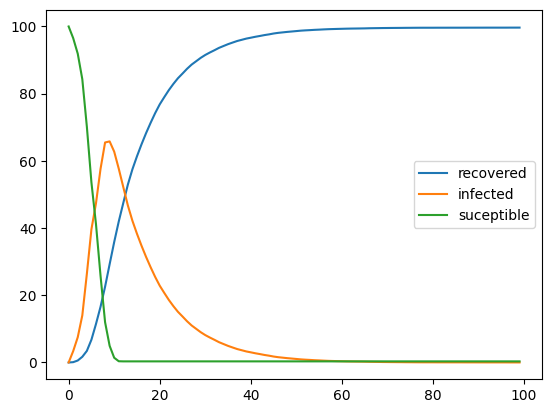

In [5]:
# infection_times is a numpy array of the time of infection of each node (the node id is the index)
# recover_times is a numpy array of the time of recovery of each node (the node id is the index)
infection_times = sir.inf_time
recover_times = sir.rec_time

# count the number of recovered nodes at each time step
recovered = np.zeros(100)
infected = np.zeros(100)
suceptible = np.zeros(100)
for i in range(100):
    recovered[i] = np.count_nonzero(recover_times <= i)
    infected[i] = np.count_nonzero(infection_times <= i) - recovered[i]
    suceptible[i] = len(G.nodes()) - infected[i] - recovered[i]

# print the number of recovered, infected and suceptible nodes at day 30
print("recovered: ", (recovered[30]/len(G.nodes()))*100)
print("infected: ", (infected[30]/len(G.nodes()))*100)
print("suceptible: ", (suceptible[30]/len(G.nodes()))*100)

recovered = (recovered / len(G.nodes())) * 100
infected = (infected / len(G.nodes())) * 100
suceptible = (suceptible / len(G.nodes())) * 100

# plotting the percentage of suceptible, infected and recovered nodes at each time step
plt.plot(recovered, label="recovered")
plt.plot(infected, label="infected")
plt.plot(suceptible, label="suceptible")
plt.legend()
plt.show()

In [6]:
# Time at which 60% of the population is infected at the same time
x = np.where(infected >= 60)[0][0]
print("Time at which 60% of the population is infected at the same time: day", x)

# Time at which 60% of the population is either infected or recovered
y = np.where((infected + recovered) >= 60)[0][0]
print("Time at which 60% of the population is either infected or recovered: day ", y)

Time at which 60% of the population is infected at the same time: day 8
Time at which 60% of the population is either infected or recovered: day  7


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [7]:
def graph_with_less_edges(G, n):
    y  = np.random.randint(0, high=len(G.edges), size=n)
    z = np.array(G.edges)[y]
    H = G.copy()
    H.remove_edges_from(z)
    return H

In [28]:
def simulation_statistics(G, sim, n):
    recoveredG = np.zeros(100)
    infectedG = np.zeros(100)
    suceptibleG = np.zeros(100)
    for i in range(100):
        recoveredG[i] = np.count_nonzero(sim.rec_time <= i)
        infectedG[i] = np.count_nonzero(sim.inf_time <= i) - recoveredG[i]
        suceptibleG[i] = len(G.nodes()) - infectedG[i] - recoveredG[i]

    # print the number of infected, recovered and suceptible nodes at day 30
    print("Statistics for the graph with ", n, " edges removed uniformly at random")
    print("Number of infected nodes at day 30: ", (infectedG[30]/len(G.nodes())) * 100)
    print("Number of recovered nodes at day 30: ", (recoveredG[30]/len(G.nodes())) * 100)
    print("Number of suceptible nodes at day 30: ", (suceptibleG[30]/len(G.nodes())) * 100)

In [29]:
# Sampling 1000 edges uniformly at random and removing them from the graph
H1 = graph_with_less_edges(G, 1000)
H2 = graph_with_less_edges(G, 10000)

# instantiating an sir model
sir1 = epidemics_helper.SimulationSIR(H1, beta=10.0, gamma=0.1)
source1 = np.random.randint(0, high=len(G.nodes))
sir1.launch_epidemic(source=source1, max_time=100)

sir2 = epidemics_helper.SimulationSIR(H2, beta=10.0, gamma=0.1)
source2 = np.random.randint(0, high=len(G.nodes))
sir2.launch_epidemic(source=source2, max_time=100)

# Printing the statistics for the graph with 1000 removed edges
simulation_statistics(H1, sir1, 1000)
print("-----------------------------")
# Printing the statistics for the graph with 10000 removed edges
simulation_statistics(H2, sir2, 10000)



Epidemic stopped after 99.44 days | 99.44 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 101.83 days | 101.83 days elapsed | 56.7% susceptible, 0.0% infected, 43.3% recovered
Statistics for the graph with  1000  edges removed uniformly at random
Number of infected nodes at day 30:  9.293455685208263
Number of recovered nodes at day 30:  90.25716551489748
Number of suceptible nodes at day 30:  0.44937879989426377
-----------------------------
Statistics for the graph with  10000  edges removed uniformly at random
Number of infected nodes at day 30:  4.735470714852158
Number of recovered nodes at day 30:  38.55972206487671
Number of suceptible nodes at day 30:  56.704807220271135


In [30]:
print(G.edges(6))


[(6, 5), (6, 8), (6, 26312), (6, 10)]


#### Exercise 2.11: Strategy 2

In [207]:
# create function that gives a modefied version of the graph with 2500 edges removed such that the avreage degree of the nodes is less than 1
H3 = G.copy()
H3.remove_edges_from(list(nx.bridges(H3)))
removed = len(list(nx.bridges(G)))

X = sorted(list(H3.degree), key=lambda x: x[1])
for tup in X:
    if H3.degree[tup[0]] > 1 and removed < 3500:
        removed += int(tup[1]/2)
        H3.remove_edges_from(list(H3.edges(tup[0]))[:int(tup[1]/2)])
print("removed edges: ", removed)

sir3 = epidemics_helper.SimulationSIR(H3, beta=10.0, gamma=0.1)
x = np.random.randint(0, high=len(G.nodes)-1)
print(x)
sir3.launch_epidemic(source=x, max_time=100)

removed edges:  3500
14322
Epidemic stopped after 100.89 days | 100.89 days elapsed | 26.5% susceptible, 0.0% infected, 73.5% recovered


In [208]:
simulation_statistics(H3, sir3, 2500)

Statistics for the graph with  2500  edges removed uniformly at random
Number of infected nodes at day 30:  12.223858615611192
Number of recovered nodes at day 30:  61.2741210679355
Number of suceptible nodes at day 30:  26.502020316453308
